# Things I had to do in the terminal before being able to use this notebook


## Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

## go into env
conda activate ox

## install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

## makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

## other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gd
%matplotlib inline

In [2]:
place_name = "Simbach a.Inn, Landkreis Rottal-Inn, Bayern, Germany"

In [3]:
# Specify the name that is used to seach for the data


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)


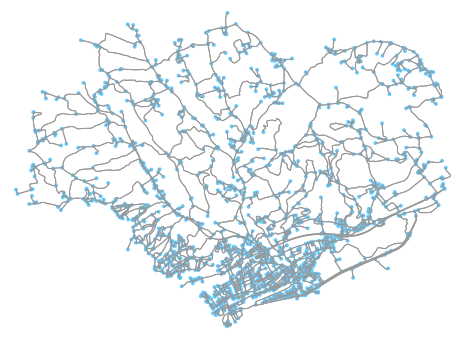

In [4]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [6]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(place_name)
#bos = buildings[buildings['amenity'].isin(buildings_of_interest)]
#separation to get all shops for nicer visualization
shop = buildings[buildings['shop'].notnull()]


In [7]:
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['police', 'kindergarten', 'place_of_worship', 'fire_station', 'restaurant', 'emergency_service']
shop = ['supermarket', 'toys', 'florist', 'car_repair', 'general']
building = ['yes', 'train_station', 'hospital', 'shop', 'shed', 'garage', 'residential', 'farm_auxiliary', 'farm', 'church', 'service', 'commercial', 'garages', 'roof', 'office', 'industrial', 'semidetached_house', 'apartments', 'retail', 'house', 'greenhouse', 'transformer_tower', 'chapel', 'kindergarten', 'construction']
leisure = ['sports_centre', 'bowling_alley']
sport = ['climbing']
['amenity', 'shop', 'building', 'leisure', 'sport']


In [8]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(place_name)
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets
nodes, edges = ox.graph_to_gdfs(graph)


In [9]:
#extra just for hospitals for nicer visulisation
healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
boish = ox.pois_from_place(place_name, amenities=healthcare)
#boisr = ox.pois_from_place(place_name, shop=)

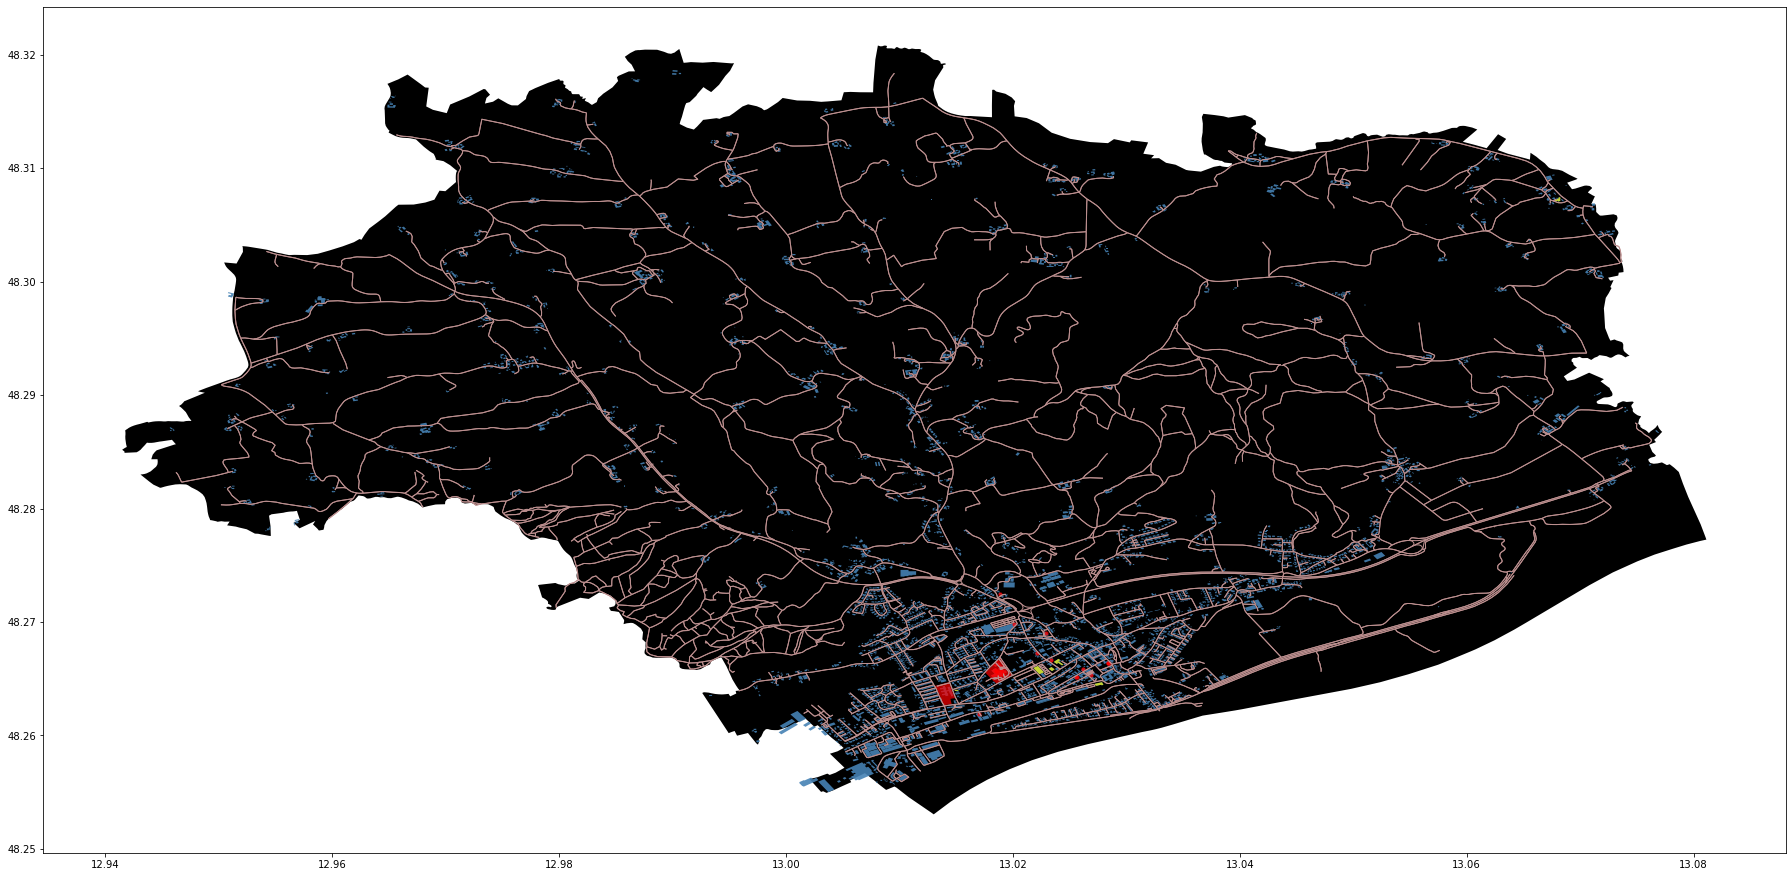

In [10]:
fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
buildings.plot(ax=ax, facecolor='steelblue', alpha=0.9)
shop.plot(ax=ax, facecolor='yellow', alpha=0.7)

# Plot healthcare
boish.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()


In [11]:
boish

osmid                                           geometry  \
1378929959  1378929959                          POINT (13.02010 48.26980)   
1488847536  1488847536                          POINT (13.02848 48.26640)   
1744190576  1744190576                          POINT (13.01873 48.26528)   
1744190602  1744190602                          POINT (13.01896 48.26578)   
1757144379  1757144379                          POINT (13.01917 48.26545)   
2572125790  2572125790                          POINT (13.02692 48.26533)   
3670643120  3670643120                          POINT (13.02555 48.26514)   
5235388321  5235388321                          POINT (13.01886 48.27249)   
6636874297  6636874297                          POINT (13.02567 48.26516)   
6703149650  6703149650                          POINT (13.02621 48.26583)   
6988316188  6988316188                          POINT (13.02842 48.26635)   
6988316189  6988316189                          POINT (13.02842 48.26637)   
7004492949  7004492949                          POINT (13.01855 48.26573)   
7004492950  7004492950                          POINT (13.01861 48.26565)   
7044791217  7044791217                          POINT (13.01698 48.26189)   
7402630347  7402630347                          POINT (13.02335 48.26662)   
7521672361  7521672361                          POINT (13.02214 48.26727)   
7856531992  7856531992                          POINT (13.02294 48.26906)   
162557540    162557540  POLYGON ((13.01884 48.26683, 13.01943 48.26599...   
162557541    162557541  POLYGON ((13.01890 48.26666, 13.01947 48.26587...   
162557544    162557544  POLYGON ((13.01861 48.26663, 13.01874 48.26656...   
162557547    162557547  POLYGON ((13.01851 48.26594, 13.01824 48.26583...   
162557548    162557548  POLYGON ((13.01873 48.26642, 13.01902 48.26610...   
162557550    162557550  POLYGON ((13.01855 48.26628, 13.01867 48.26615...   
162557552    162557552  POLYGON ((13.01910 48.26583, 13.01922 48.26578...   
162557553    162557553  POLYGON ((13.01877 48.26599, 13.01887 48.26596...   
232008068    232008068  POLYGON ((13.01461 48.26276, 13.01449 48.26323...   

                 addr:city addr:country addr:housenumber addr:postcode  \
1378929959  Simbach am Inn           DE               37         84359   
1488847536  Simbach am Inn           DE              NaN         84359   
1744190576             NaN          NaN              NaN           NaN   
1744190602             NaN          NaN              NaN           NaN   
1757144379             NaN          NaN              NaN           NaN   
2572125790             NaN          NaN              NaN           NaN   
3670643120  Simbach am Inn          NaN               7b         84359   
5235388321             NaN          NaN                2         84359   
6636874297  Simbach am Inn           DE               7b         84359   
6703149650  Simbach am Inn           DE                6         84359   
6988316188  Simbach am Inn           DE               16         84359   
6988316189  Simbach am Inn           DE               16         84359   
7004492949  Simbach am Inn           DE               10         84359   
7004492950  Simbach am Inn           DE               10         84359   
7044791217             NaN          NaN               11           NaN   
7402630347  Simbach am Inn           DE                4         84359   
7521672361  Simbach am Inn           DE               13         84359   
7856531992  Simbach am Inn           DE               29         84359   
162557540              NaN          NaN              NaN           NaN   
162557541              NaN          NaN              NaN           NaN   
162557544              NaN          NaN              NaN           NaN   
162557547              NaN          NaN              NaN           NaN   
162557548              NaN          NaN              NaN           NaN   
162557550              NaN          NaN              NaN           NaN   
162557552 

In [12]:
ox.pd.set_option('display.max_rows', None)

In [13]:
buildings

nodes  \
134670861  [1480352069, 2503895054, 1480352062, 148035206...   
134670862  [2095168208, 1480352043, 1480352027, 209516820...   
135570386  [1488829625, 2497748254, 2497748253, 148882961...   
135570390  [1488829620, 1488829615, 1488829599, 148882960...   
135573054  [1488847591, 2500442438, 2500442437, 148884758...   
135573055  [1488847558, 1488847548, 1488847553, 422708752...   
135573056  [5459919346, 1488847540, 1488847544, 148884750...   
135574440  [1488857962, 1488857958, 2497748229, 148885794...   
135574978  [1488867607, 1488867601, 1488867592, 250553078...   
135574980  [1488867590, 1488867582, 1488867585, 148886760...   
135574981  [1488867581, 1488867577, 2505530727, 250553072...   
135574982  [1488867621, 2505530871, 2505530865, 250553084...   
136491338  [1497203689, 4433888408, 4423412405, 442341240...   
138448051  [1518005645, 7856767287, 1518005656, 151800565...   
162557547  [1744190569, 1744190570, 1744190571, 174419057...   
162557548  [1744190585, 1744190586, 1744190587, 174419058...   
162557550  [1744190590, 1744190591, 1744190592, 174419059...   
162557552  [1744190597, 1744190598, 1744190582, 174419058...   
162557553  [1744190605, 1744190606, 1744190607, 174419060...   
163405739  [1751054470, 1751054471, 1751054469, 175105447...   
164054179  [7264693666, 1757144394, 1757144397, 250557678...   
164594324  [1762122347, 1762122348, 1762122349, 176212235...   
166724517  [1781740998, 1781741005, 1781740986, 178174099...   
166724518  [1781740985, 1781740990, 1781740987, 178174099...   
166724519  [1781740997, 1781740993, 1781741004, 178174098...   
166724520  [1781740994, 1781740988, 1781741001, 178174100...   
166724521  [1781740996, 1781741000, 1781740991, 178174100...   
199527096  [2095168206, 1480352051, 1480352052, 209516820...   
208942893  [2191999287, 2191999304, 2191999285, 219199927...   
208942894  [2191999240, 2191999235, 2191999226, 219199923...   
208942895  [3842391467, 3842391967, 2191999183, 219199919...   
208942896  [2191999233, 2191999237, 2191999232, 219199922...   
208942897  [2191999256, 2191999263, 2191999251, 219199924...   
208942898  [2191999299, 2191999288, 2191999282, 219199929...   
208942899  [2191999190, 2191999186, 2191999184, 219199918...   
208942900  [2191999210, 2191999224, 2191999196, 219199919...   
208942901  [2191999228, 2191999205, 2191999198, 219199922...   
208942903  [2191999261, 2191999244, 2191999241, 219199925...   
208942904  [2191999268, 2191999273, 2191999265, 219199926...   
208942905  [2191999252, 2191999259, 2191999247, 219199923...   
208942906  [2191999212, 2191999191, 2191999189, 219199920...   
208942907  [2191999248, 2191999246, 2191999255, 219199925...   
208942908  [2191999284, 2191999281, 2191999275, 219199930...   
216955355  [2262736073, 2262736070, 2262736068, 226273606...   
232008067  [2403523041, 2403523008, 2403523011, 240352306...   
232008148  [2403527963, 2403527960, 2403527964, 240352796...   
232010650  [2403563385, 2403563384, 2403563386, 240356338...   
232118556  [2404813567, 2404813569, 2404813570, 240481356...   
233224113  [2415791530, 2415791532, 2415791529, 241579153...   
233224114  [2415791539, 2415791531, 1833919069, 241579153...   
242335093  [2498270879, 2498270860, 2498270873, 249827089...   
242335096  [2498270858, 2498270870, 2498270864, 249827085...   
242335100  [2498271558, 2498271543, 2498271535, 249827155...   
242335102  [2498271826, 2498271737, 2498271729, 249827182...   
242335103  [2498271644, 2498271621, 2498271638, 249827165...   
242335112  [2498271336, 2498271376, 2498271394, 249827135...   
242335114  [2498270868, 2498270862, 2498270891, 249827090...   
242335115  [2498271753, 2498271726, 2498271716, 249827173...   
242335118  [2498271337, 2498271366, 2498271355, 249827132...   
242335122  [2498271738, 2498271717, 2498271732, 249827175...   
242335125  [2498271052, 2498271041, 2498271047, 249827106...   
242335129  [2498271606, 2498271588, 2498271573, 249827158...   
242335132  [2498270918,

In [14]:
#buildings.loc[buildings['building']=='detached']

In [15]:
#bois2 = buildings.loc[:, ['amenity','shop','geometry','nodes']]


In [16]:
#for x in bois2.index:
#    bois2.loc[x]

In [17]:
#buildings = ox.footprints_from_place(place_name)
#shop = buildings[buildings['shop'].notnull()]

In [18]:
#idea check to see if ox.pois_from_place(place_name, amenities=buildings_of_interest) and ox.footprints_from_place(place_name) 
#do the same not finished but they are not, for Wedding!
bos = buildings[buildings['building'].isin(['construction'])]
bos

nodes      building  \
832312535  [7770582415, 7770582413, 7770582416, 777058241...  construction   

                                                    geometry addr:city  \
832312535  POLYGON ((13.00765 48.26105, 13.00788 48.26117...       NaN   

          addr:country addr:housename addr:housenumber addr:postcode  \
832312535          NaN            NaN              NaN           NaN   

          addr:street wikidata  ... roof:colour roof:levels roof:orientation  \
832312535         NaN      NaN  ...         NaN         NaN              NaN   

          roof:shape bicycle_parking covered level location  construction  \
832312535        NaN             NaN     NaN   NaN      NaN  unclassified   

                                    fixme  
832312535  Exact dimensions and position.  

[1 rows x 69 columns]

In [19]:
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['police', 'kindergarten', 'place_of_worship', 'fire_station', 'restaurant', 'emergency_service']
shop = ['supermarket', 'toys', 'florist', 'car_repair', 'general']
building = ['yes', 'train_station', 'hospital', 'shop', 'shed', 'garage', 'residential', 'farm_auxiliary', 'farm', 'church', 'service', 'commercial', 'garages', 'roof', 'office', 'industrial', 'semidetached_house', 'apartments', 'retail', 'house', 'greenhouse', 'transformer_tower', 'chapel', 'kindergarten', 'construction']
leisure = ['sports_centre', 'bowling_alley']
sport = ['climbing']
['amenity', 'shop', 'building', 'leisure', 'sport']


In [20]:
def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['garage', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue','funeral_hall']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                buildings[col] = [np.nan]*len(buildings)

        loc_class_dic['work'] = ['farm_auxiliary', 'farm', 'service', 'office', 'industrial', 'retail', 'greenhouse', 'transformer_tower', 'construction']\
            + list(df_buildings['amenity'].unique())\
            + list(df_buildings['shop'].unique())

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['public', 'hut', 'train_station', 'chapel', 'church', 'train_station', 'parish_hall', 'townhall','supermarket',
                                   'restaurant', 'grocery_store', 'cafe', 'sports_centre']\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

In [21]:
loc_class_dic = assign_location_classifier(buildings)
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[list_cols].dropna().unique(), loc_class_dic), axis = 1) 

In [25]:
buildings['building_type'].value_counts()

home                  4755
excluded_buildings      84
work                    52
public                  13
school                   2
hospital                 1
Name: building_type, dtype: int64

In [23]:
import matplotlib.cm as cm 

/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


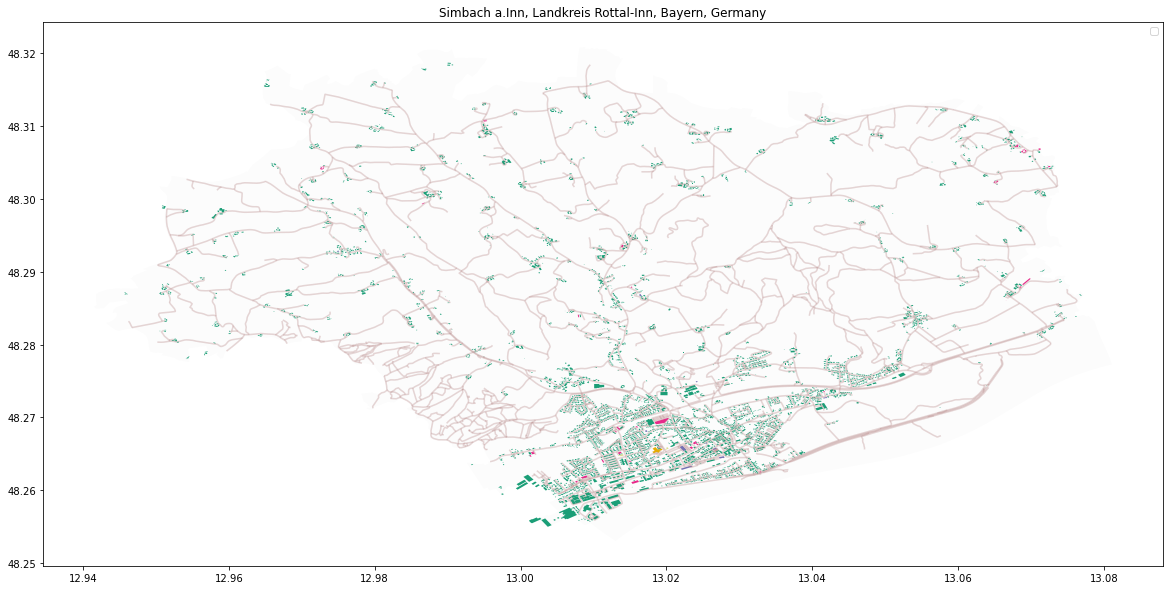

In [24]:
locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}
plotrange=0.02
neighbourhood = 3
print()


fig, ax = plt.subplots(figsize=(25,10))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
edges.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=False,legend_kwds={'frameon':False, 'loc':'lower right'})
    #ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    #ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    #ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
plt.legend()
plt.title(place_name)
plt.savefig(place_name+'_location_type_map.png', dpi=600)
#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)